In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_datareader as pdr
import matplotlib.ticker as mticker
import numpy as np

# Consumption Inequality and Inflation

## Executive Summary

There appears to be a negative correlation between consumption inequality and inflation across 1980 to 2012.

This is consistent also with [Meyer and Sullivan (2017, NBER WP23655)](https://www.nber.org/papers/w23655):

* These authors looked at the ratios of 90/10, 50/10 and 90/50 consumption percentiles.

* Consumption inequality was rising from 1980 to 2004, but then it started falling from 2005 until 2014.

We superimpose these consumption inequality facts with inflation over the same periods.

Thed fact for the US are:

1. Consumption inequality (measure by percentile ratios or log-variance) was rising (but slower than income inequality).

2. Between 1960s to 1980 inflation was rising. Post 1981, inflation was steadily trending downwards.

3. Consumption inequality since 2005 has been falling.

Evidence 3 has been true 

* the UK (see [Blundell and Etheridge, RED, 2010](https://doi.org/10.1016/j.red.2009.10.004)) - since 1993

* Sweden ([see Daunfeldt et al, 2010](https://ideas.repec.org/p/hhs/huiwps/0039.html)) between 1988-2005

Summary (for US): **Consumption inequality vs inflation is hump-shape**.

1. For 1980-2004 data, in sufficiently high ranges of inflation, consumption inequality was negatively correlated with inflation: consumption inequality rose but inflation rose.

2. For post-2005 data, with low ranges of inflation, consumption inequality was also positively correlated with inflation: consumption inequality fell and inflation fell.

# Annual consumption inequality (log-consumption variance)

* Source: [Attanasio and Pistaferri, *Consumption Inequality*](https://dx.doi.org/%E2%80%8B10.1257/jep.30.2.3)

In [3]:
dfap = pd.read_csv('../data/Attanasio-Pistaferri-JEP/figure1.csv')
dfap.head()

,year,Aguiar and Bils (2015),"Attanasio, Battistin, and Ichimura (2007)","Heathcote, Perri, and Violante (2010)",Attanasio and Pistaferri (2014)
0,1980,NaN,NaN,0.189369,0.215180
1,1981,0.233448,NaN,0.190891,0.220321
2,1982,0.221172,0.221172,0.221172,0.221172
3,1983,0.253357,0.234060,0.238080,0.224829
4,1984,0.278517,0.243893,0.233268,0.222791


In [4]:
dfap.tail()

,year,Aguiar and Bils (2015),"Attanasio, Battistin, and Ichimura (2007)","Heathcote, Perri, and Violante (2010)",Attanasio and Pistaferri (2014)
28,2008,NaN,NaN,NaN,0.313026
29,2009,NaN,NaN,NaN,NaN
30,2010,NaN,NaN,NaN,0.291535
31,2011,NaN,NaN,NaN,NaN
32,2012,NaN,NaN,NaN,0.289027


# Annual CPI inflation (US)

* Source: [FRED series ``FPCPITOTLZGUSA``](https://fred.stlouisfed.org/series/FPCPITOTLZGUSA)

In [5]:
# Get the data - need to dig around on FRED: https://fred.stlouisfed.org/
list_of_series = ['FPCPITOTLZGUSA',]                 
dffred = pdr.DataReader(list_of_series, 'fred', '1980-01-01', '2012-01-01')
dffred.reset_index(level=0, inplace=True)
dffred.head()

,DATE,FPCPITOTLZGUSA
0,1980-01-01,13.549202
1,1981-01-01,10.334715
2,1982-01-01,6.131427
3,1983-01-01,3.212435
4,1984-01-01,4.300535


In [6]:
dffred.tail()

,DATE,FPCPITOTLZGUSA
28,2008-01-01,3.839100
29,2009-01-01,-0.355546
30,2010-01-01,1.640043
31,2011-01-01,3.156842
32,2012-01-01,2.069337


In [7]:
df =dfap.join(dffred['FPCPITOTLZGUSA'])
df.set_index(['year',])

,Aguiar and Bils (2015),"Attanasio, Battistin, and Ichimura (2007)","Heathcote, Perri, and Violante (2010)",Attanasio and Pistaferri (2014),FPCPITOTLZGUSA
year,,,,,
1980,NaN,NaN,0.189369,0.215180,13.549202
1981,0.233448,NaN,0.190891,0.220321,10.334715
1982,0.221172,0.221172,0.221172,0.221172,6.131427
1983,0.253357,0.234060,0.238080,0.224829,3.212435
1984,0.278517,0.243893,0.233268,0.222791,4.300535
1985,0.297002,0.247802,0.227988,0.236820,3.545644
1986,0.333548,0.255124,0.230478,0.226204,1.898048
1987,0.308187,0.260934,0.235329,NaN,3.664563
1988,0.317751,0.264595,0.237515,NaN,4.077741


## Attanasio-Pistaferri full sample (1980-2012)

<Figure size 432x288 with 0 Axes>

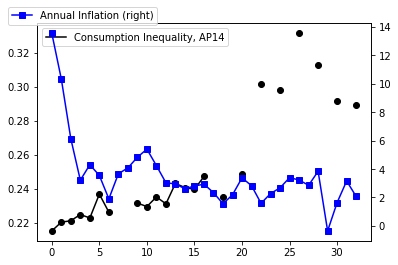

In [8]:
plt.figure()
df.plot(y='Attanasio and Pistaferri (2014)', 
            style='o-k',
            label='Consumption Inequality, AP14')
ax = df["FPCPITOTLZGUSA"].plot( secondary_y=True,
                                style='-sb',
                                label='Annual Inflation')
ax.legend(loc='best', bbox_to_anchor=(-0.125, 0.6, 0.5, 0.5))
dates = list(range(1980, 2013))
plt.show()

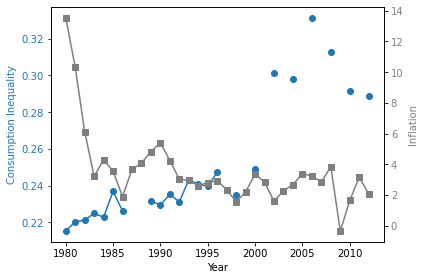

In [9]:
# dates = list(range(1980, 2013))

fig, ax1 = plt.subplots()

# Left y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Consumption Inequality', color=color)
ax1.plot(df['year'], df['Attanasio and Pistaferri (2014)'], '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Right y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:gray'
ax2.set_ylabel('Inflation', color=color)  # we already handled the x-label with ax1
ax2.plot(df['year'], df['FPCPITOTLZGUSA'], '-s', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


<Figure size 432x288 with 0 Axes>

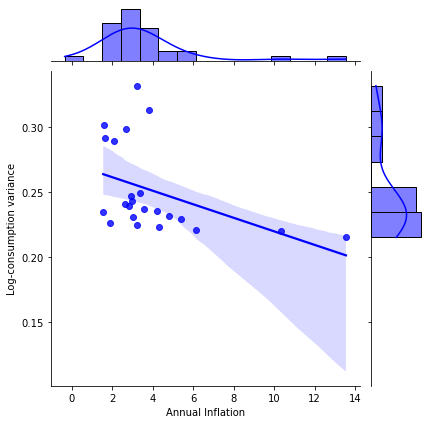

In [10]:
plt.figure()
g = sns.jointplot(x="FPCPITOTLZGUSA", y="Attanasio and Pistaferri (2014)", 
                  data=df, 
                  kind="reg",
                  color ="blue")
g.ax_joint.set_xlabel('Annual Inflation', fontweight='normal')
g.ax_joint.set_ylabel('Log-consumption variance', fontweight='normal')
plt.show()

In [11]:
df_2006 = df.loc[df['year'] > 2003]
df_2006

,year,Aguiar and Bils (2015),"Attanasio, Battistin, and Ichimura (2007)","Heathcote, Perri, and Violante (2010)",Attanasio and Pistaferri (2014),FPCPITOTLZGUSA
24,2004,0.416012,NaN,0.257603,0.298125,2.677237
25,2005,0.405734,NaN,0.285433,NaN,3.392747
26,2006,0.431814,NaN,NaN,0.331529,3.225944
27,2007,NaN,NaN,NaN,NaN,2.852672
28,2008,NaN,NaN,NaN,0.313026,3.839100
29,2009,NaN,NaN,NaN,NaN,-0.355546
30,2010,NaN,NaN,NaN,0.291535,1.640043
31,2011,NaN,NaN,NaN,NaN,3.156842
32,2012,NaN,NaN,NaN,0.289027,2.069337


<Figure size 432x288 with 0 Axes>

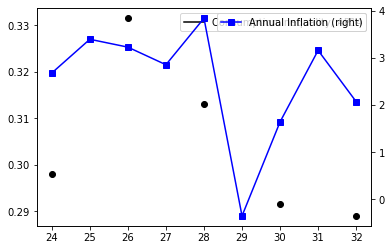

In [12]:
plt.figure()
df_2006.plot(y='Attanasio and Pistaferri (2014)', 
            style='o-k',
            label='Consumption Inequality, AP14')
ax = df_2006["FPCPITOTLZGUSA"].plot( secondary_y=True,
                                style='-sb',
                                label='Annual Inflation')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

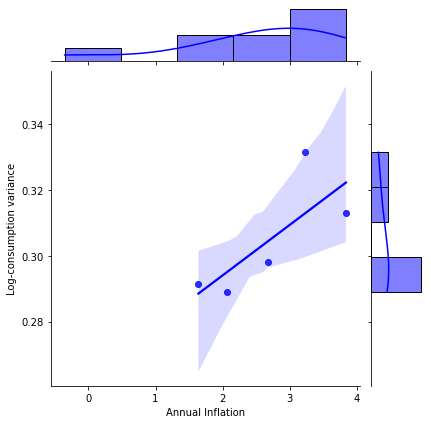

In [13]:
plt.figure()
g = sns.jointplot(x="FPCPITOTLZGUSA", y="Attanasio and Pistaferri (2014)", 
                  data=df_2006, 
                  kind="reg",
                  color ="blue")
g.ax_joint.set_xlabel('Annual Inflation', fontweight='normal')
g.ax_joint.set_ylabel('Log-consumption variance', fontweight='normal')
plt.show()

## Aguiar and Bils (2015, AER) data from 1980-2006 only 

<Figure size 432x288 with 0 Axes>

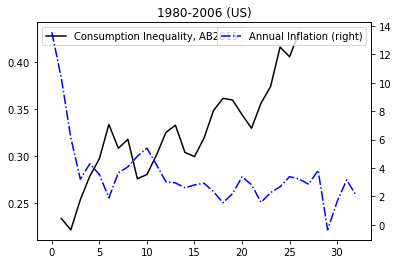

In [14]:
plt.figure()
ax = df.plot(y='Aguiar and Bils (2015)', 
            style='-k',
            label='Consumption Inequality, AB2015')
ax = df["FPCPITOTLZGUSA"].plot( secondary_y=True,
                                style='-.b',
                                label='Annual Inflation')
# ax.set_xticklabels(df['year'])
plt.legend()
plt.title('1980-2006 (US)')
plt.show()

<Figure size 432x288 with 0 Axes>

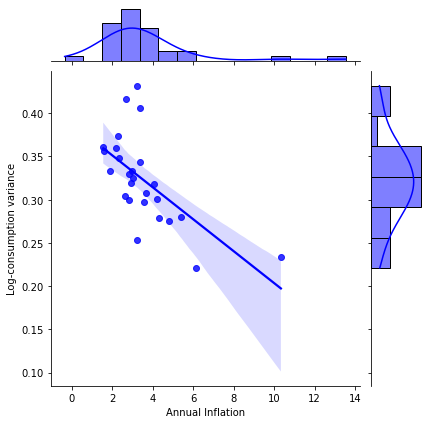

In [15]:
plt.figure()
g = sns.jointplot(x="FPCPITOTLZGUSA", y="Aguiar and Bils (2015)", 
                  data=df, 
                  kind="reg",
                  color ="blue")
g.ax_joint.set_xlabel('Annual Inflation', fontweight='normal')
g.ax_joint.set_ylabel('Log-consumption variance', fontweight='normal')
plt.show()